In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats.csv


In [4]:
df=pd.read_csv('cookie_cats.csv')
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [ ]:
# userid  уникальный идентификатор
# version gate_30 - контрольная группа A (ворота на 30 уровне)
#         gate_40 - тестовая группа B (ворота на 40 уровне)
# sum_gamerounds количество раундов, сыгранных игроком за
#                первые 14 дней после установки
# retention_1    игрок вернулся и поиграл через 1 день после
#                установки
# retention_7    игрок вернулся и поиграл через 7 дней после
#                установки

In [5]:
# отредактируем данные
df.loc[df.version=='gate_30', 'version']='A'
df.loc[df.version=='gate_40', 'version']='B'
df.retention_1=df.retention_1.astype('int')
df.retention_7=df.retention_7.astype('int')
df.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,0,0
1,337,A,38,1,0
2,377,B,165,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [7]:
df.duplicated().sum()

0

In [ ]:
# пропусков и дубликатов нет

In [8]:
df.nunique()

,0
userid,90189
version,2
sum_gamerounds,942
retention_1,2
retention_7,2


In [ ]:
# все пользователи уникальны

In [ ]:
df.groupby('version').agg({'userid':'count'})
# число пользователей в группах

,userid
version,
A,44700
B,45489


In [ ]:
# проанализируем среднее количество сыгранных раундов по группам

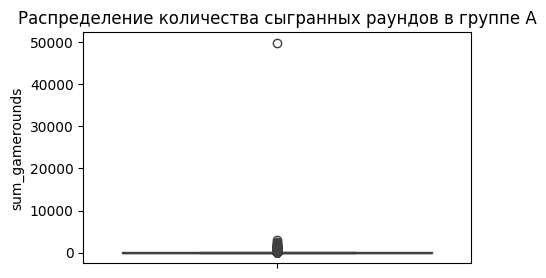

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y=df[df.version=='A'].sum_gamerounds);
plt.title('Распределение количества сыгранных раундов в группе А');

In [ ]:
df[df.sum_gamerounds>10000] # выброс

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,A,49854,0,1


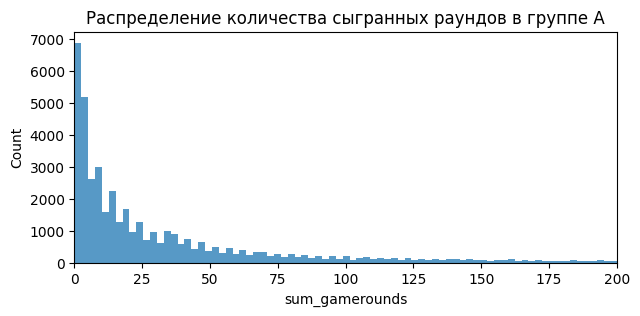

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(x=df[df.version=='A'].sum_gamerounds);
plt.title('Распределение количества сыгранных раундов в группе А');
plt.xlim(0, 200);

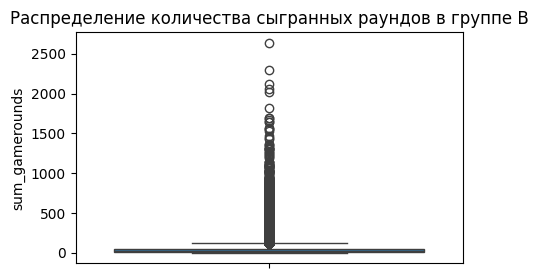

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y=df[df.version=='B'].sum_gamerounds);
plt.title('Распределение количества сыгранных раундов в группе B');

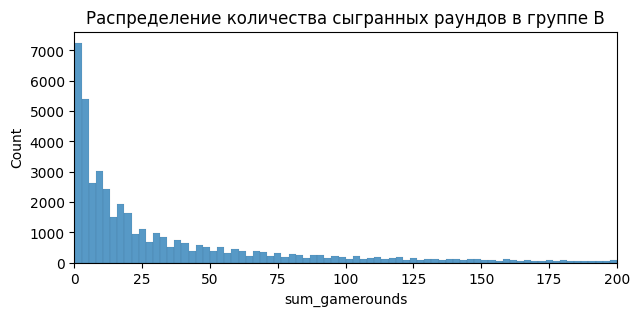

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(x=df[df.version=='B'].sum_gamerounds);
plt.title('Распределение количества сыгранных раундов в группе B');
plt.xlim(0, 200);

In [9]:
df.groupby('version').agg({'sum_gamerounds':'mean'})

,sum_gamerounds
version,
A,52.456264
B,51.298776


In [ ]:
df.groupby('version').agg({'sum_gamerounds':'median'})

,sum_gamerounds
version,
A,17.0
B,16.0


In [10]:
df_=df.drop(labels=57702).copy() # удалим выброс

In [12]:
df_.groupby('version').agg({'sum_gamerounds':'mean'})

,sum_gamerounds
version,
A,51.342111
B,51.298776


In [ ]:
# даже после удаления выброса в группе А среднее количество сыгранных
# раундов в группе А больше, чем в группе В

In [ ]:
df_.groupby('version').agg({'sum_gamerounds':'median'})

,sum_gamerounds
version,
A,17.0
B,16.0


In [ ]:
# медиана в группе А также больше

In [13]:
# бутстреп для построения 95% доверительного интервала для разности между
# средними значениями количества сыгранных раундов (данные без выброса)
a_=df_[df_.version=='A'].sum_gamerounds
b_=df_[df_.version=='B'].sum_gamerounds
bootstrap=[]
for _ in range(1000):
  c=np.random.choice(a_, 44700, True)
  t=np.random.choice(b_, 45489, True)
  bootstrap.append(np.mean(t)-np.mean(c))
print('95% доверительный интервал: ', np.quantile(bootstrap, 0.025), ' ', \
      np.quantile(bootstrap, 0.975))

95% доверительный интервал:  -1.2626940617770086   1.230511905968562


In [ ]:
# нет статистически значимых отличий в средних значениях количества сыгранных
# раундов по группам

In [14]:
# проанализируем retention_1
df.groupby('version').agg({'retention_1':'mean'})

,retention_1
version,
A,0.448188
B,0.442283


In [ ]:
# метрика выше в группе А

In [ ]:
tst=pd.crosstab(df.version, df.retention_1)
tst

retention_1,0,1
version,,
A,24666,20034
B,25370,20119


In [ ]:
stats.chi2_contingency(tst) # уровень значимости 0.05

Chi2ContingencyResult(statistic=3.1591007878782262, pvalue=0.07550476210309086, dof=1, expected_freq=array([[24799.13514952, 19900.86485048],
       [25236.86485048, 20252.13514952]]))

In [ ]:
# не можем отклонить Н0 (переменные не связаны между собой)

In [ ]:
# проанализируем retention_7
df.groupby('version').agg({'retention_7':'mean'})

,retention_7
version,
A,0.190201
B,0.182000


In [ ]:
# метрика выше в группе А

In [15]:
tst=pd.crosstab(df.version, df.retention_7)
tst

retention_7,0,1
version,,
A,36198,8502
B,37210,8279


In [ ]:
stats.chi2_contingency(tst) # уровень значимости 0.05

Chi2ContingencyResult(statistic=9.959086799559167, pvalue=0.0016005742679058301, dof=1, expected_freq=array([[36382.90257127,  8317.09742873],
       [37025.09742873,  8463.90257127]]))

In [ ]:
# можем отклонить Н0 (переменные не связаны между собой)
# получаем доказательства того, что retention_7 больше в группе А

In [ ]:
# По результатам анализа можно рекомендовать оставить ворота на 30
# уровне - вариант контрольной группы. По результатам анализа
# метрики retention_7 можно утверждать, что метрика падает в варианте
# тестовой группы - ворота перенесли на 40 уровень.